## Observations and Insights 
** I have cleaned and checked the raw data within the information that provided in from Pymaceuticals I found 5 repeated raw which have been removed. and the number of total mic is identical within the provided information

** calculating the mean and median for each drug efect on Tumor Volume values, I found that mean and median ar close in values, which it mean that the dataset has a symmetircal distribution

** quick look to 'Female vs Male Distribuation' pie chart will show clearly that, they are almost half Male and half Female.

** looking to "Total number of timepoints per Drug" bar chart will show that the (Capomulin and Ramicane) have much haighr rate of testing, and Propriva is the lowest testing point drug

** inalizing the box plot:
    1. Capomulin and Ramicane have the best results over other treatments on that chart.
    2. Ramicane median line is lower than Capomulin, which I think Ramicane has a better impact as the median show smaller Tumor Volume



In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df= pd.merge(mouse_metadata,study_results,on="Mouse ID",how="left")
# Display the data table for preview
print('single joined dataframe')
merge_df

single joined dataframe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
print('unique mice ID')
merge_df["Mouse ID"].nunique()

unique mice ID


249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicat_df=merge_df[merge_df.duplicated(["Mouse ID","Timepoint"])]


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
print('duplicate time point per a mouse ID')
duplicat_df

duplicate time point per a mouse ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
print('clean data set i.e. no duplication')
clean_df

clean data set i.e. no duplication


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
#orignal data frame record after merge was 1893, there are 5 duplicated row are found, then the final results 
#should be 1888 

# i have displayed all the columnst just to make sure that all the columns have the same size, i.e no missing data 
print(' display the updated number for all the column including Mouse ID')
clean_df.count()

 display the updated number for all the column including Mouse ID


Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [14]:
print('unique mice ID for the cleaned data frame')
clean_df["Mouse ID"].nunique()

unique mice ID for the cleaned data frame


249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary=pd.DataFrame(columns=['Mean', 'Median', 'Variance', 'Standard deviation','SEM'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary['Mean']=clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
summary['Median']=clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
summary['Variance']=clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
summary['Standard deviation']=clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
summary['SEM']=clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble and print the resulting series into a single summary dataframe.
summary.head(20)

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#second_summary=pd.DataFrame(columns=['Mean', 'Median', 'Variance', 'Standard deviation','SEM'])
# Using the aggregation method, produce the same summary statistics in a single line
summary2=clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median', 'var', 'std','sem']})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
#style jupyter notebook to display the pandas bar chart in the center of working window

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

(0.0, 250.0)

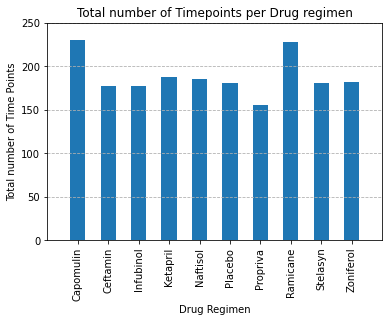

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df=clean_df.groupby(['Drug Regimen'])["Timepoint"].count()
df.rename_axis('Col Name', axis=0)
ax=df.plot.bar(rot=90,ylabel='Total number of Time Points',title='Total number of Timepoints per Drug regimen')
ax.grid(which='major', axis='y', linestyle='--')
ax.set_xlim(-1,10)
ax.set_ylim(0,250)

##### 

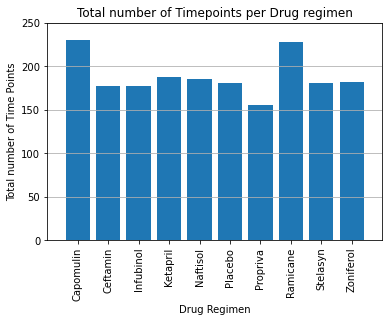

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

dp=df.reset_index()
plt.bar(dp['Drug Regimen'],dp['Timepoint'])
plt.grid(axis = 'y')
#ax.grid(which='major', axis='y', linestyle='--')
plt.title('Total number of Timepoints per Drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of Time Points')
plt.xticks(rotation=90)
plt.xlim(-1,10)
plt.ylim(0,250)
plt.show()

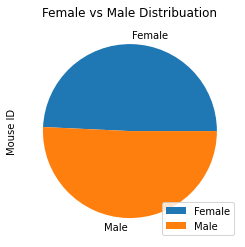

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female=clean_df.groupby(['Sex'])['Mouse ID'].count()

male_female.plot.pie(title='Female vs Male Distribuation',legend=True)
plt.legend(loc='lower right')

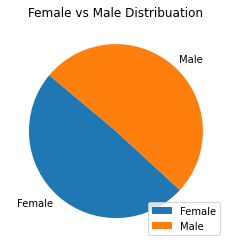

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
indexed_ma=male_female.reset_index()

plt.pie(indexed_ma['Mouse ID'],labels=indexed_ma['Sex'],startangle=140)
plt.title('Female vs Male Distribuation')
plt.legend(loc='lower right')
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest=clean_df.groupby(['Mouse ID'],as_index=False)['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest= pd.merge(greatest,clean_df,on=["Mouse ID","Timepoint"],how="left")
greatest

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment

# Create empty list to fill with tumor vol data (for plotting)
#data frame created 
tumor_vol_df=pd.DataFrame(columns=treatment)
#writing the cleaned data to csv file to check it
#greatest.to_csv('drugs.csv')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# create a list to save drug and it's lower_bound and upper_bound
upper_lower=[[],[],[]]
# Locate the rows which contain mice on each drug and get the tumor volumes
#apply a filter on row drug containet to get the tumor volume
for drug in treatment:
    # add subset 
    tumor_vol_df[drug]=(greatest[greatest['Drug Regimen']==drug]['Tumor Volume (mm3)']).reset_index(drop=True)
    
    # Determine outliers using upper and lower bounds
    #quartile calculations
    quartiles =tumor_vol_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    #lower and upper bound calculation
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #save into a list
    upper_lower[0].append(drug)
    upper_lower[1].append(lower_bound)
    upper_lower[2].append(upper_bound)

print("Drug Regimen \tLower Bound \t\tUpper Bound")
for x in range(4):
    for y in range(3):
        print(upper_lower[y][x],end='\t')
    print()


Drug Regimen 	Lower Bound 		Upper Bound
Capomulin	20.70456164999999	51.83201549	
Ramicane	17.912664470000003	54.30681135	
Infubinol	36.83290494999999	82.74144559000001	
Ceftamin	25.355449580000002	87.66645829999999	


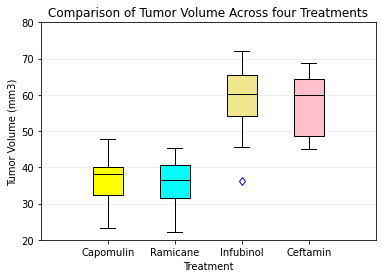

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
color_set=[['yellow','cyan','khaki','pink'],
           ['red','green','blue','black'],
          ['v','o','d','s']]
    
#]
fig7, ax7 = plt.subplots()

c='cyan'
dd=ax7.boxplot(tumor_vol_df,labels=treatment,patch_artist=True,
           boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor='red'),
            medianprops=dict(color='black'))
# so we can use it for reading data values but not be distracting
ax7.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax7.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Comparison of Tumor Volume Across four Treatments',
    xlabel='Treatment',
    ylabel='Tumor Volume (mm3)',
)
for i in range(4):
    plt.setp(dd['boxes'][i], facecolor=color_set[0][i])
    plt.setp(dd['fliers'][i], color=color_set[1][i],
             markeredgecolor=color_set[1][i],
            marker=color_set[2][i])
    
plt.xlim(0,5)
plt.ylim(20,80)
plt.show()

 ## Line and Scatter Plots

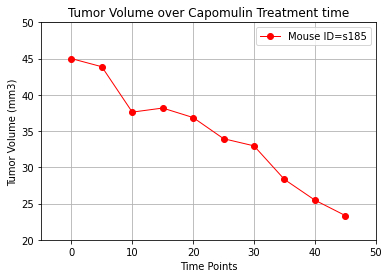

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_ID=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:].iloc[0]['Mouse ID']

sub_set=clean_df[clean_df['Mouse ID']==mouse_ID][['Timepoint','Tumor Volume (mm3)']]


x_axis= sub_set['Timepoint']
plt.plot(x_axis, sub_set['Tumor Volume (mm3)'], linewidth=1, marker="o", color="red",
        label=f"Mouse ID={mouse_ID}")
plt.legend()
plt.title('Tumor Volume over Capomulin Treatment time')
plt.xlabel("Time Points")
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.xlim(-5,50)
plt.ylim(20,50)
plt.show()

<IPython.core.display.Javascript object>


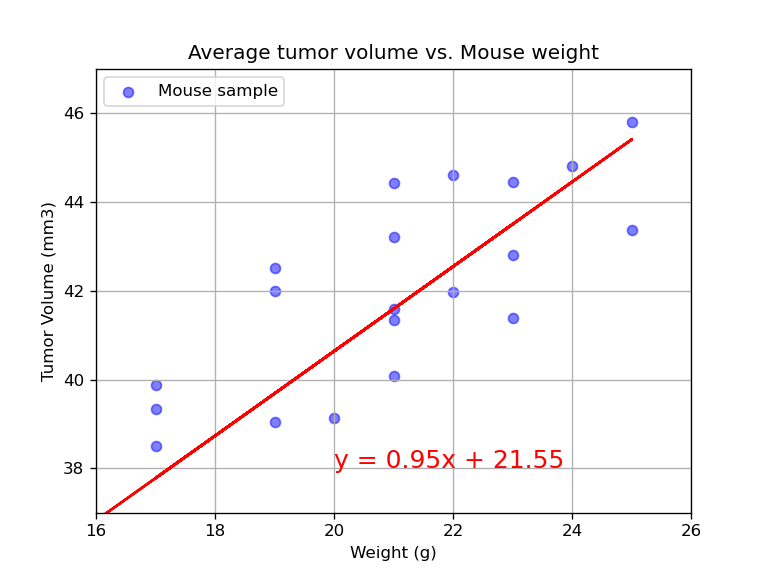

In [26]:
%matplotlib notebook
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
sub=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
sub=sub.groupby('Mouse ID').mean('Tumor Volume (mm3)')
sub
plt.scatter(sub['Weight (g)'], sub['Tumor Volume (mm3)'],  c="b", alpha=0.5, marker='o',
            label="Mouse sample")
plt.title('Average tumor volume vs. Mouse weight')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='upper left')
plt.grid()
plt.xlim(16,26)
plt.ylim(37,47)
plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
weight=sub.iloc[:,1]
volume=sub.iloc[:,3]

correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = weight
y_values = volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")

plt.show()


The correlation between both factors is 0.84
